Load Cleaned Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting config
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 6)

# Load cleaned dataset
df = pd.read_csv('../data/cleaned/students_cleaned.csv')
df.head()


# Dataset overview
print("📊 Dataset Shape:", df.shape)

# Column data types
print("\n🧾 Column Data Types:\n")
print(df.dtypes)

# Check for missing values
print("\n🕳️ Missing Values:\n")
print(df.isnull().sum())

# Preview dataset
df.head()



📊 Dataset Shape: (1000, 10)

🧾 Column Data Types:

gender             object
race/ethnicity     object
parent_edu         object
lunch              object
prep_course        object
math_score          int64
reading_score       int64
writing_score       int64
average_score     float64
performance        object
dtype: object

🕳️ Missing Values:

gender            0
race/ethnicity    0
parent_edu        0
lunch             0
prep_course       0
math_score        0
reading_score     0
writing_score     0
average_score     0
performance       0
dtype: int64


,gender,race/ethnicity,parent_edu,lunch,prep_course,math_score,reading_score,writing_score,average_score,performance
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Good
1,female,group C,some college,standard,completed,69,90,88,82.333333,Very Good
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Excellent
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Poor
4,male,group C,some college,standard,none,76,78,75,76.333333,Good


 Distribution of Scores (Static + Interactive)

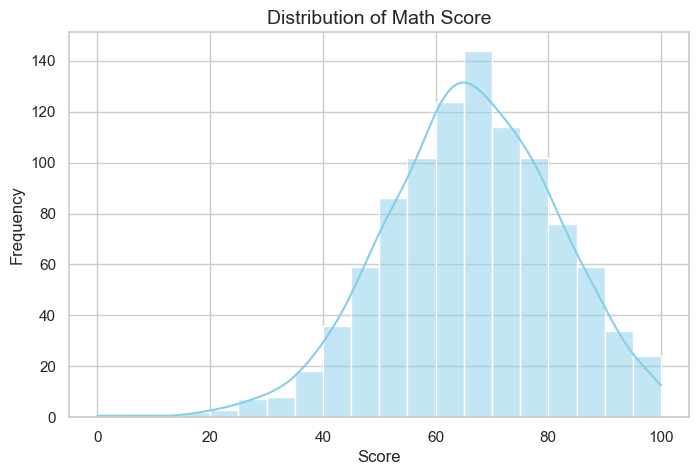

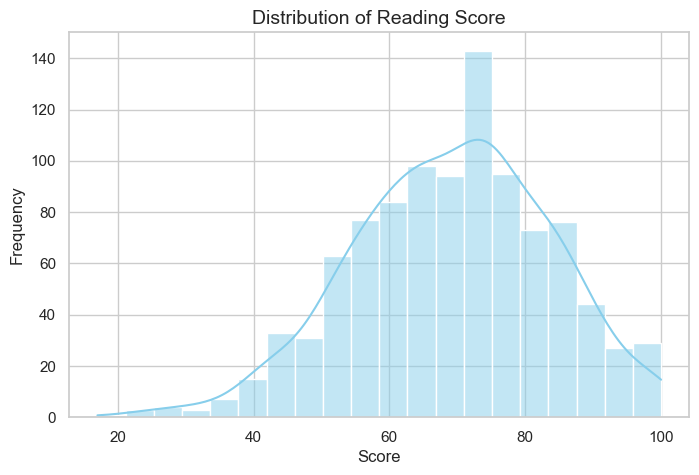

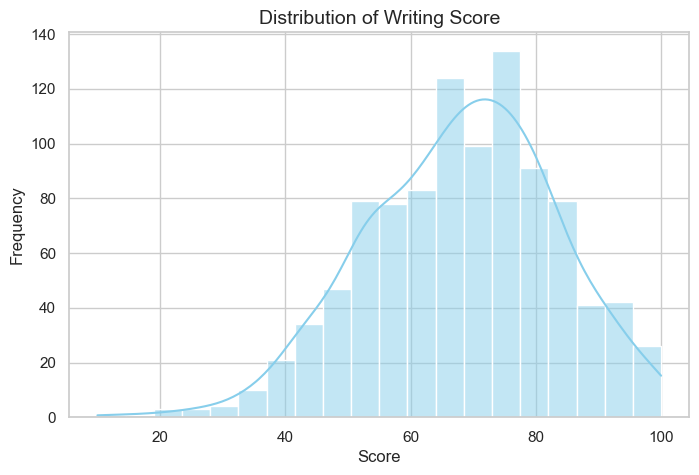

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

score_cols = ['math_score', 'reading_score', 'writing_score']
sns.set(style="whitegrid")

for col in score_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {col.replace("_", " ").title()}', fontsize=14)
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()


Interactive Plotly Distributions

In [5]:
import plotly.express as px

for col in score_cols:
    fig = px.histogram(df, x=col, nbins=25, marginal="violin", color_discrete_sequence=['#636EFA'])
    fig.update_layout(
        title=f"Interactive Distribution of {col.replace('_', ' ').title()}",
        xaxis_title='Score',
        yaxis_title='Count'
    )
    fig.show()


Gender-Based Performance Analysis

Seaborn Boxplots for Subject Scores by Gender

C:\Users\NISHANT\AppData\Local\Temp\ipykernel_33132\168476702.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




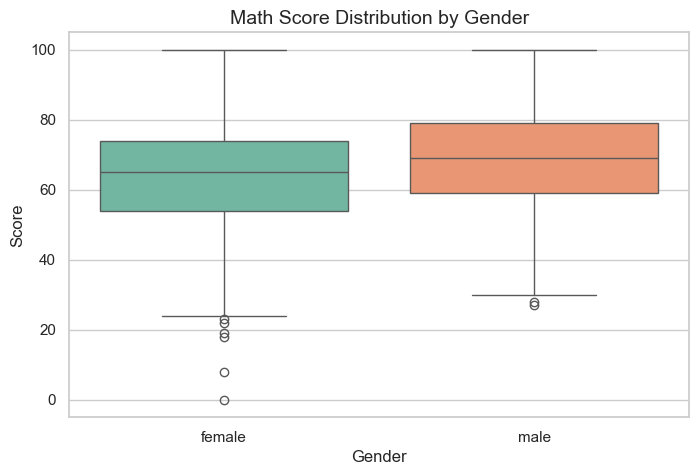

C:\Users\NISHANT\AppData\Local\Temp\ipykernel_33132\168476702.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




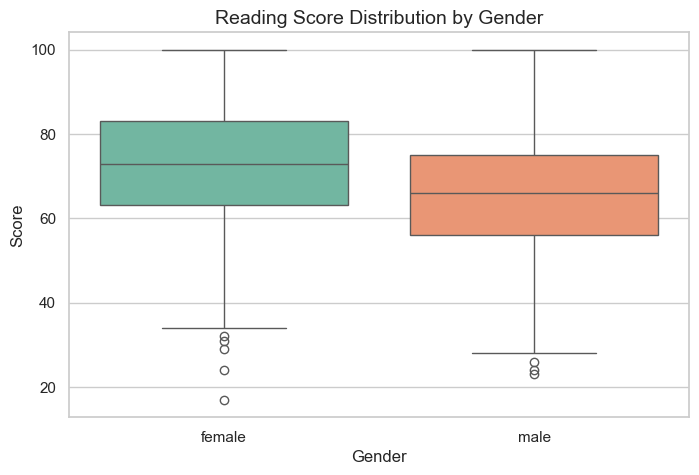

C:\Users\NISHANT\AppData\Local\Temp\ipykernel_33132\168476702.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




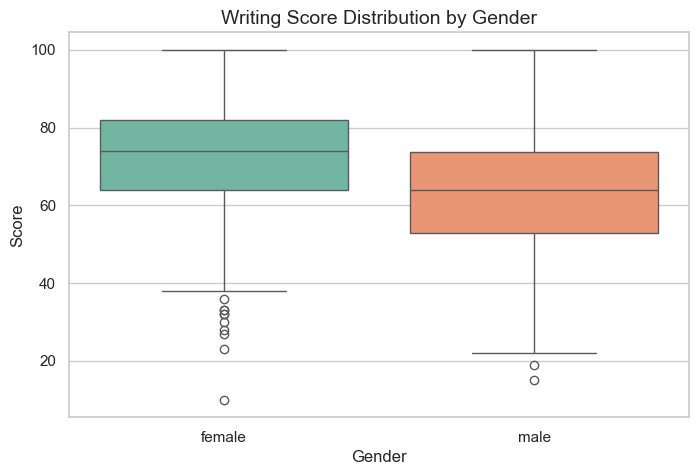

In [6]:
for col in ['math_score', 'reading_score', 'writing_score']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='gender', y=col, data=df, palette='Set2')
    plt.title(f'{col.replace("_", " ").title()} Distribution by Gender', fontsize=14)
    plt.xlabel('Gender')
    plt.ylabel('Score')
    plt.show()


Interactive Bar Chart: Average Score by Gender

In [7]:
import plotly.express as px

avg_by_gender = df.groupby('gender')[['math_score', 'reading_score', 'writing_score', 'average_score']].mean().reset_index()

fig = px.bar(avg_by_gender.melt(id_vars='gender', value_vars=['math_score', 'reading_score', 'writing_score', 'average_score']),
             x='variable', y='value', color='gender',
             barmode='group', text_auto='.2s',
             labels={'value': 'Average Score', 'variable': 'Subject'},
             title="Average Scores by Gender")
fig.update_layout(yaxis_title='Score')
fig.show()


Performance Level Distribution by Gender

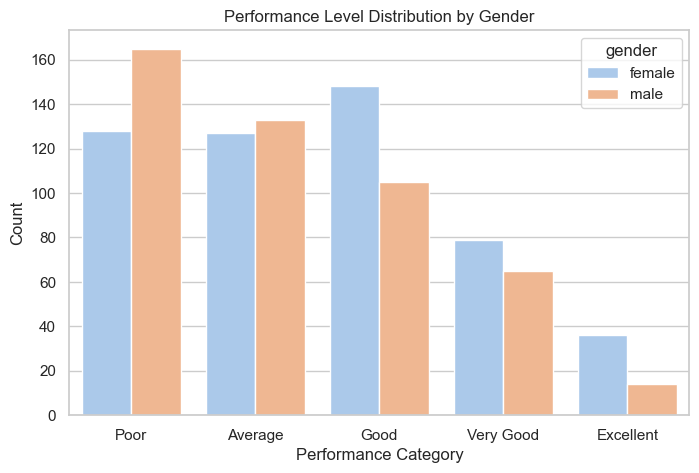

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='performance', hue='gender', palette='pastel',
              order=['Poor', 'Average', 'Good', 'Very Good', 'Excellent'])
plt.title("Performance Level Distribution by Gender")
plt.xlabel("Performance Category")
plt.ylabel("Count")
plt.show()


Race/Ethnicity-Based Performance Analysis

Average Score by Race/Ethnicity (Bar Plot)

C:\Users\NISHANT\AppData\Local\Temp\ipykernel_33132\350908664.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\NISHANT\AppData\Local\Temp\ipykernel_33132\350908664.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




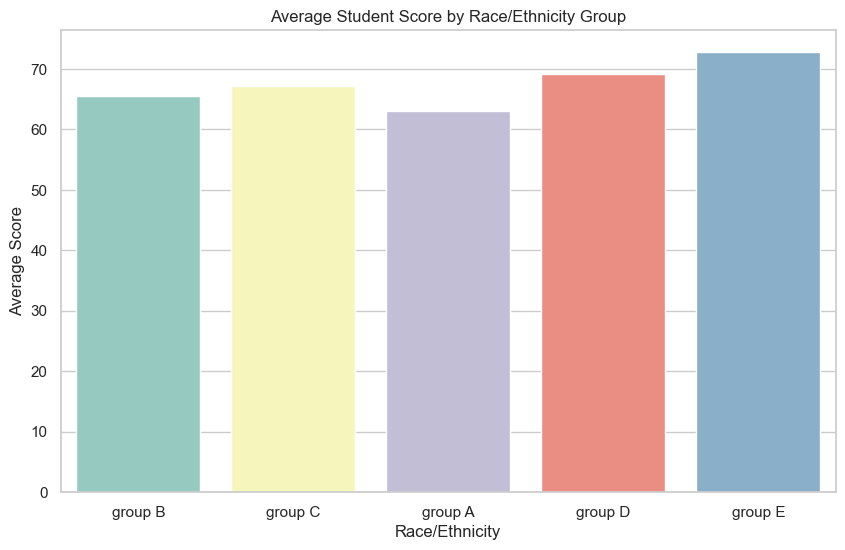

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='race/ethnicity', y='average_score',
            estimator='mean', ci=None, palette='Set3')
plt.title("Average Student Score by Race/Ethnicity Group")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Average Score")
plt.show()


Violin Plot: Score Distributions per Group

C:\Users\NISHANT\AppData\Local\Temp\ipykernel_33132\1709077029.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




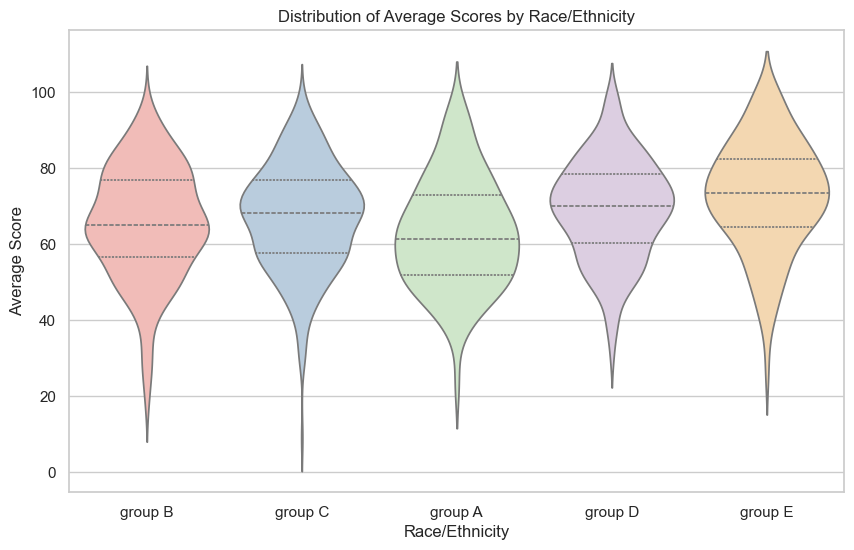

In [10]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='race/ethnicity', y='average_score', inner='quartile', palette='Pastel1')
plt.title("Distribution of Average Scores by Race/Ethnicity")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Average Score")
plt.show()


Interactive Plotly Bar Chart

In [11]:
import plotly.express as px

race_group_avg = df.groupby('race/ethnicity')[['math_score', 'reading_score', 'writing_score', 'average_score']].mean().reset_index()
race_group_avg = race_group_avg.melt(id_vars='race/ethnicity', var_name='Subject', value_name='Average')

fig = px.bar(race_group_avg,
             x='race/ethnicity', y='Average', color='Subject',
             barmode='group', text_auto='.2s',
             title='Average Subject Scores by Race/Ethnicity Group')
fig.update_layout(yaxis_title='Score', xaxis_title='Race/Ethnicity')
fig.show()


Average Score by Parental Education (Sorted Bar Plot)

C:\Users\NISHANT\AppData\Local\Temp\ipykernel_33132\1064893011.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




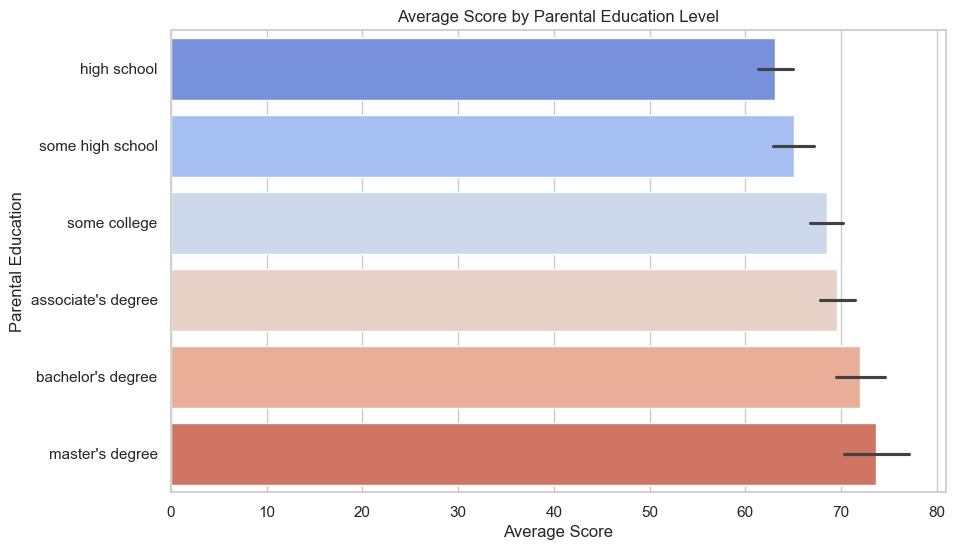

In [12]:
plt.figure(figsize=(10, 6))
order = df.groupby('parent_edu')['average_score'].mean().sort_values().index
sns.barplot(data=df, y='parent_edu', x='average_score', order=order, palette='coolwarm')
plt.title("Average Score by Parental Education Level")
plt.xlabel("Average Score")
plt.ylabel("Parental Education")
plt.show()


Subject-Wise Score Trends (Grouped Bar Plot)

<Figure size 1200x600 with 0 Axes>

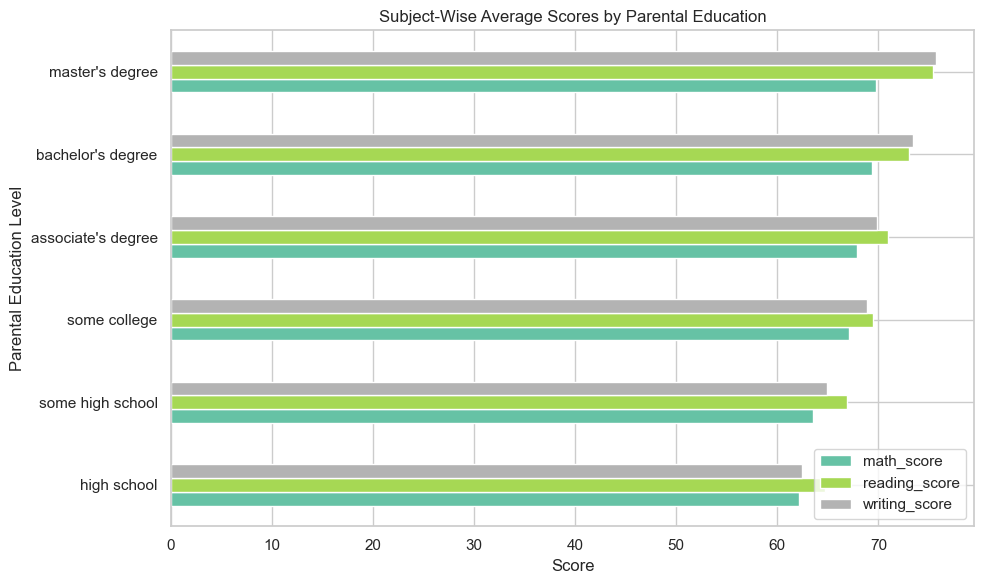

In [13]:
plt.figure(figsize=(12, 6))
edu_scores = df.groupby('parent_edu')[['math_score', 'reading_score', 'writing_score']].mean().sort_values('math_score')
edu_scores.plot(kind='barh', figsize=(10, 6), colormap='Set2')
plt.title("Subject-Wise Average Scores by Parental Education")
plt.xlabel("Score")
plt.ylabel("Parental Education Level")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


 Interactive Plotly Comparison

In [14]:
import plotly.express as px

edu_plot = df.groupby('parent_edu')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()
edu_plot = edu_plot.melt(id_vars='parent_edu', var_name='Subject', value_name='Average Score')

fig = px.bar(edu_plot, x='Average Score', y='parent_edu', color='Subject',
             orientation='h', title='Subject-wise Average Scores by Parental Education',
             text='Average Score', color_discrete_sequence=px.colors.qualitative.Set3)
fig.update_layout(yaxis_title='Parental Education', xaxis_title='Score', barmode='group')
fig.show()


Test Preparation Course Analysis

Boxplot: Test Preparation vs Average Score

C:\Users\NISHANT\AppData\Local\Temp\ipykernel_33132\3011198265.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




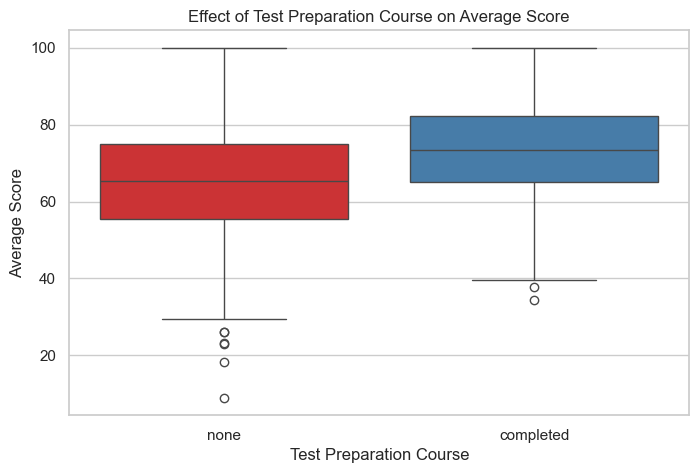

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='prep_course', y='average_score', palette='Set1')
plt.title("Effect of Test Preparation Course on Average Score")
plt.xlabel("Test Preparation Course")
plt.ylabel("Average Score")
plt.show()


Boxplots by Subject

C:\Users\NISHANT\AppData\Local\Temp\ipykernel_33132\1500080305.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




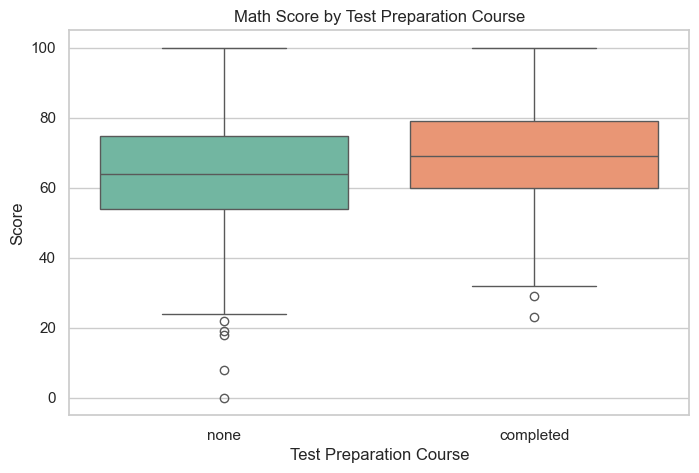

C:\Users\NISHANT\AppData\Local\Temp\ipykernel_33132\1500080305.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




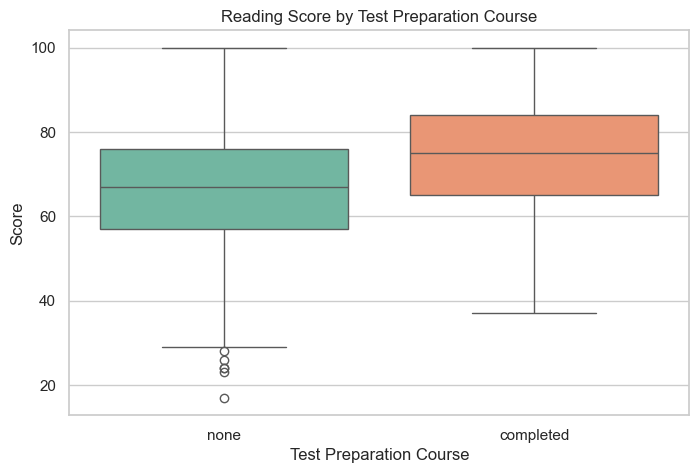

C:\Users\NISHANT\AppData\Local\Temp\ipykernel_33132\1500080305.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




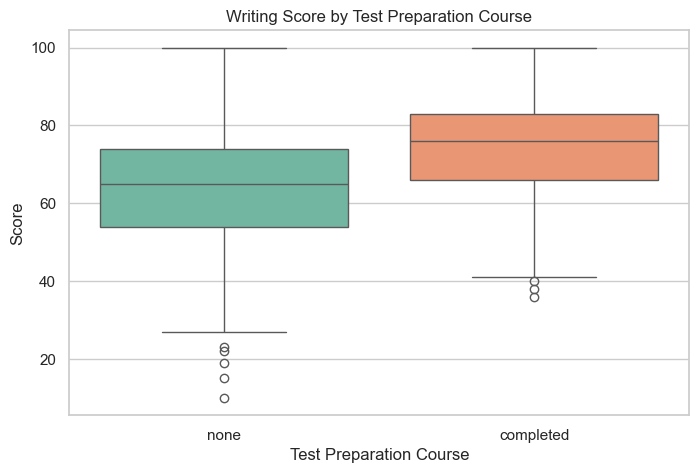

In [16]:
subjects = ['math_score', 'reading_score', 'writing_score']

for subj in subjects:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='prep_course', y=subj, palette='Set2')
    plt.title(f'{subj.replace("_", " ").title()} by Test Preparation Course')
    plt.xlabel("Test Preparation Course")
    plt.ylabel("Score")
    plt.show()


Interactive Plotly Bar Chart

In [17]:
import plotly.express as px

prep_stats = df.groupby('prep_course')[['math_score', 'reading_score', 'writing_score', 'average_score']].mean().reset_index()
prep_stats = prep_stats.melt(id_vars='prep_course', var_name='Subject', value_name='Average Score')

fig = px.bar(prep_stats, x='prep_course', y='Average Score', color='Subject',
             barmode='group', text_auto='.2s',
             title='Subject-wise Score Comparison by Test Preparation Course',
             color_discrete_sequence=px.colors.qualitative.Set1)
fig.update_layout(xaxis_title='Test Preparation', yaxis_title='Average Score')
fig.show()


Correlation Heatmap & Feature Relationships

Seaborn Correlation Heatmap (Professional Styling)

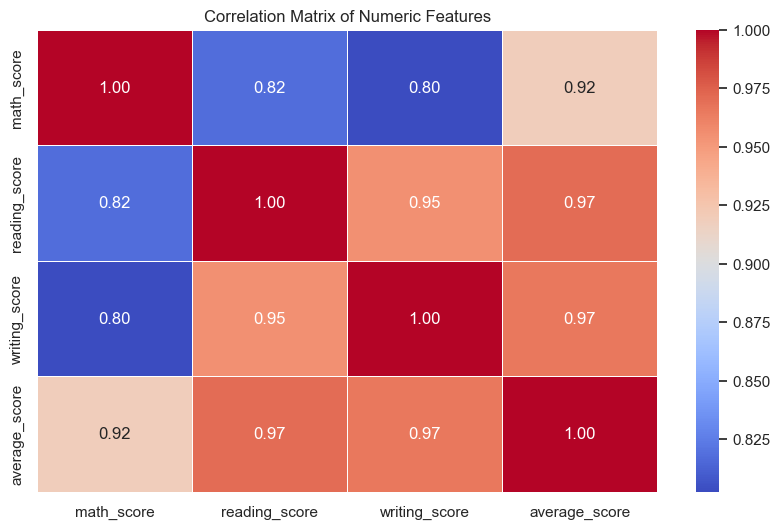

In [18]:
import numpy as np

# Compute correlation matrix
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


Interactive Plotly Correlation Heatmap

In [19]:
import plotly.figure_factory as ff

z = corr_matrix.values
x = corr_matrix.columns.tolist()
y = corr_matrix.columns.tolist()

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='RdBu', showscale=True, zmin=-1, zmax=1)
fig.update_layout(title_text="Interactive Correlation Heatmap")
fig.show()


Section 9: Performance Category Analysis

 Countplot of Performance Categories

C:\Users\NISHANT\AppData\Local\Temp\ipykernel_33132\4118855232.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




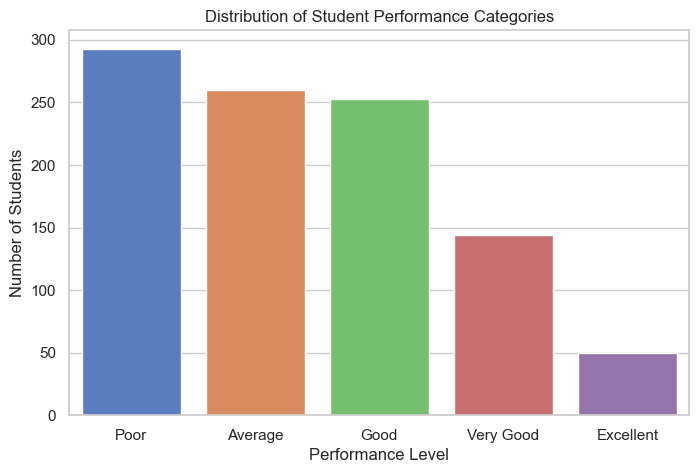

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='performance', order=['Poor', 'Average', 'Good', 'Very Good', 'Excellent'], palette='muted')
plt.title("Distribution of Student Performance Categories")
plt.xlabel("Performance Level")
plt.ylabel("Number of Students")
plt.show()


Performance by Gender (Stacked Countplot)

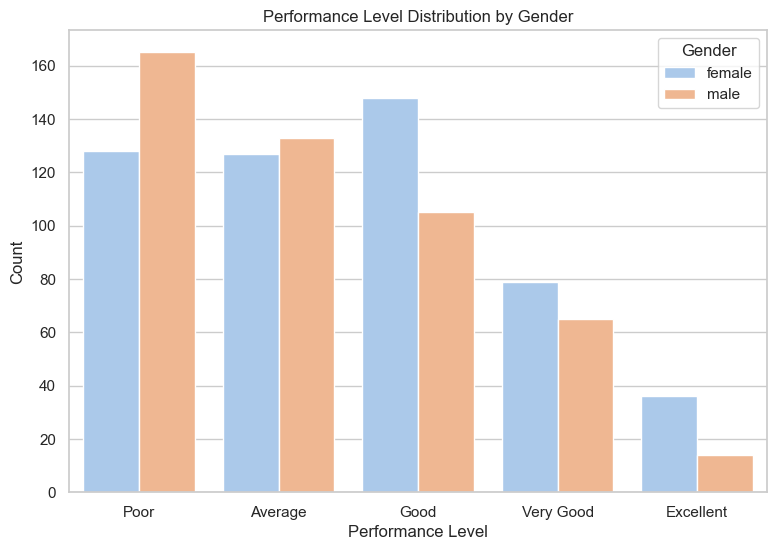

In [21]:
plt.figure(figsize=(9, 6))
sns.countplot(data=df, x='performance', hue='gender',
              order=['Poor', 'Average', 'Good', 'Very Good', 'Excellent'],
              palette='pastel')
plt.title("Performance Level Distribution by Gender")
plt.xlabel("Performance Level")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()


Interactive Donut Chart (Plotly)

In [22]:
import plotly.graph_objects as go

perf_counts = df['performance'].value_counts().reindex(['Poor', 'Average', 'Good', 'Very Good', 'Excellent'])

fig = go.Figure(data=[go.Pie(labels=perf_counts.index,
                             values=perf_counts.values,
                             hole=0.4,
                             marker=dict(colors=px.colors.sequential.Blues),
                             hoverinfo='label+percent+value')])
fig.update_layout(title_text="Performance Category Distribution (Donut Chart)")
fig.show()


Pairwise Relationships (Score Interactions)

Seaborn Pairplot (Colored by Performance)

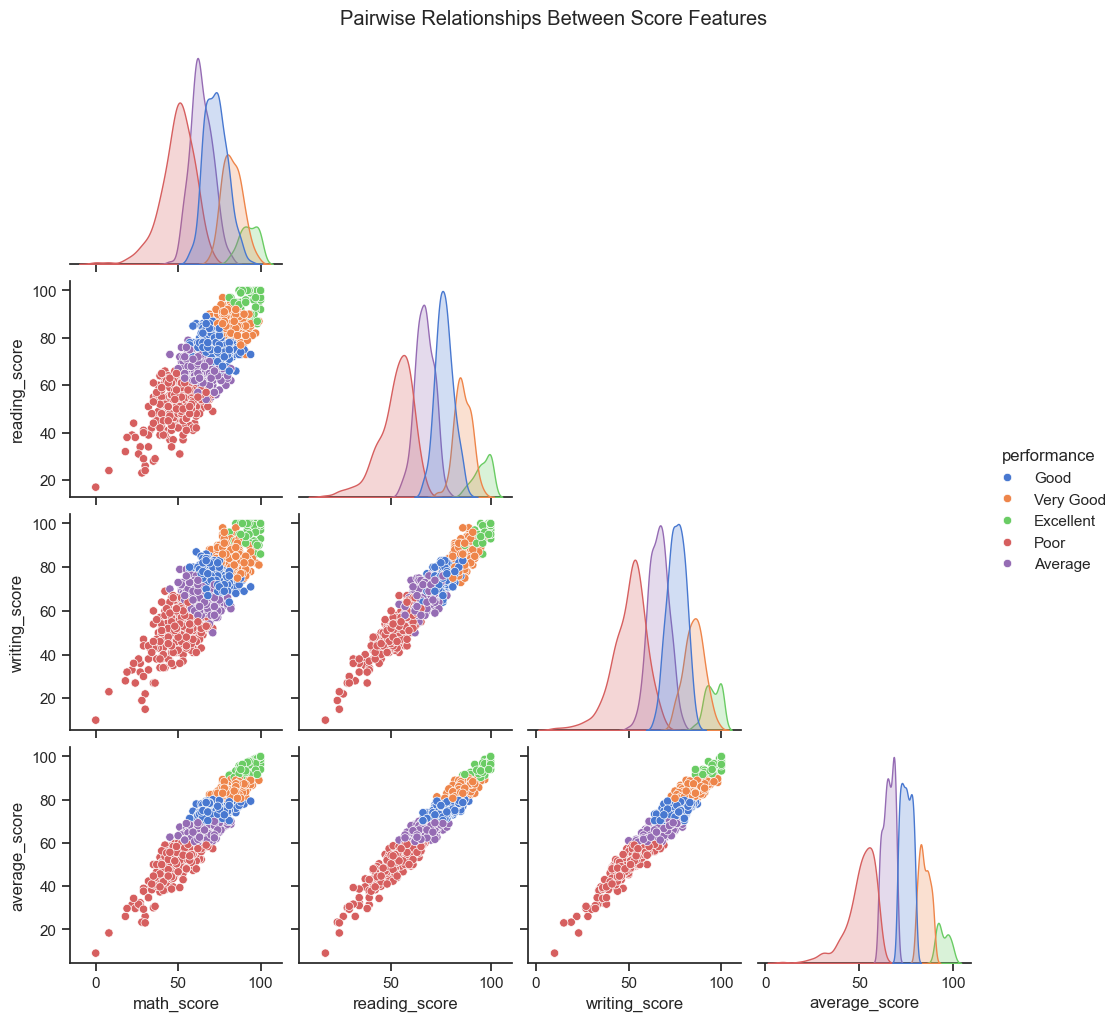

In [23]:
import seaborn as sns
sns.set(style="ticks")

score_features = ['math_score', 'reading_score', 'writing_score', 'average_score']

# Pairplot with hue based on performance
sns.pairplot(df[score_features + ['performance']],
             hue='performance',
             palette='muted',
             diag_kind='kde',
             corner=True)
plt.suptitle("Pairwise Relationships Between Score Features", y=1.02)
plt.show()


 Plotly Scatter Matrix (Interactive)